In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use("bmh")
plt.rc('font', family='SimHei', size=20) #显示中文
pd.set_option('display.max_columns',1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

这一部分我们做点时间维度相关的分析，比如看看到底这个城市的人周末骑自行车出行多，还是工作日多<br>
也就是咱们看看大家都是骑车出去玩，还是去工作。

# 4.1 区分工作日和周末

加载数据

In [2]:
bikes = pd.read_csv('bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [3]:
bikes.head()

,Berri 1,Bréeuf (donnés non disponibles),Cé­e-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnés non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [4]:
bikes.columns

Index(['Berri 1', 'Bréeuf (donnés non disponibles)', 'Cé­e-Sainte-Catherine', 'Maisonneuve 1', 'Maisonneuve 2', 'du Parc', 'Pierre-Dupuy', 'Rachel1', 'St-Urbain (donnés non disponibles)'], dtype='object')

In [5]:
bikes['Berri 1'].unique()[:5]

array([ 35,  83, 135, 144, 197], dtype=int64)

In [6]:
bikes['Berri 1'].value_counts()[:5]

3341    3
1986    2
303     2
3698    2
3964    2
Name: Berri 1, dtype: int64

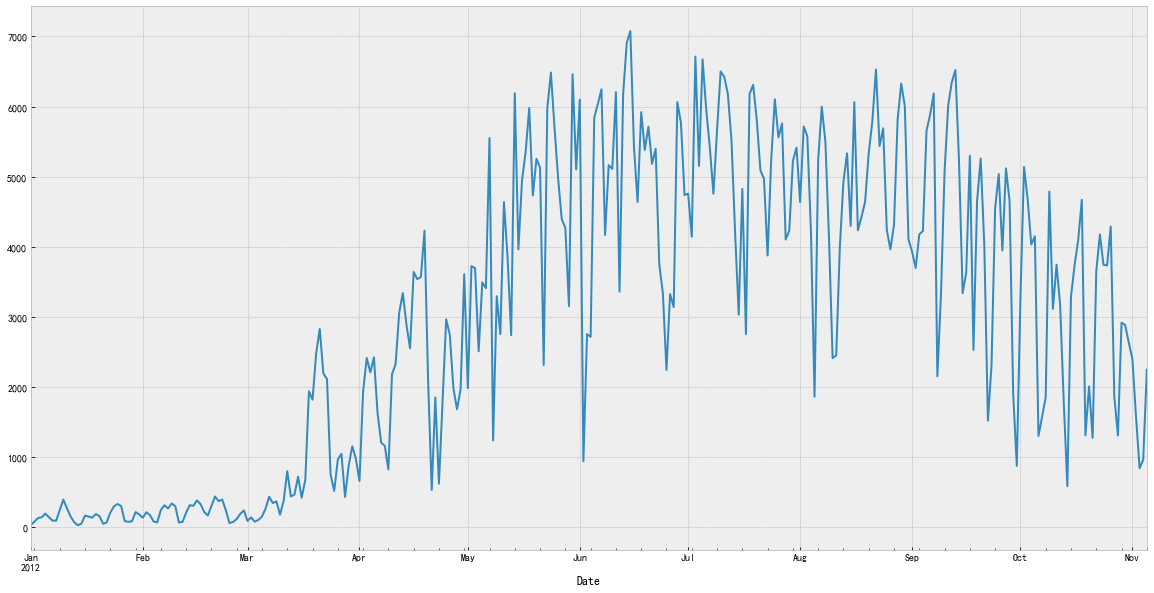

In [7]:
bikes['Berri 1'].plot(figsize=(20,10))

咱们先随便选一列出来吧，比如选'Berri 1'单独成一个berri_bikes的dataframe

In [8]:
berri_bikes = bikes[['Berri 1']].copy()

In [9]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


然后为了区分工作日和周末，我们加一列'weekday'。<br>
对了，这里要提到一个概念，叫做index，也就是大家在数据库里面熟知的索引，在dataframe里面也有，比如我们刚才的数据，index就是日期。

In [10]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

*如果仔细观察，你会发现里面有些天的数据丢失了。（牛逼的数据分析师真的一眼能看出来，咳咳，反正我也没一眼看出来）<br>
**我们通过`.day`可以直接看到是一个月的第几天。**

In [11]:
berri_bikes.index.day #一个月的第几天

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

然后我们发个大招，其实dataframe对于日期类型的数据，可以直接知道是星期几！！！

In [12]:
berri_bikes.index.weekday #一周的第几天

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

其中0是星期一，1是星期二，以此类推。所以我们可以直接生成一列，指明是星期几啦。

In [13]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 分组+排序+聚合统计

用过SQL里面的groupby吗，恰巧pandas的dataframe也有一个`.groupby()`函数，而且好用得一塌糊涂。

比如呢，下面这句 `berri_bikes.groupby('weekday').aggregate(sum)` 的意思就是说，“你给老纸把数据按照星期几分一下组，然后给我加和一下，结果返给我！！！”

In [14]:
berri_bikes.loc[berri_bikes['weekday']==0,'Berri 1'].max()

6206

In [29]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [23]:
weekday_counts.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='weekday')

哦，对了，我也不喜欢数字0, 1, 2, 3, 4, 5, 6，像我这种智商欠费的同学，根本对应不上星期几，所以取个名字好了，然后加上去。

In [21]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


完美！然后我们再画个图，哈哈哈，又是画图！

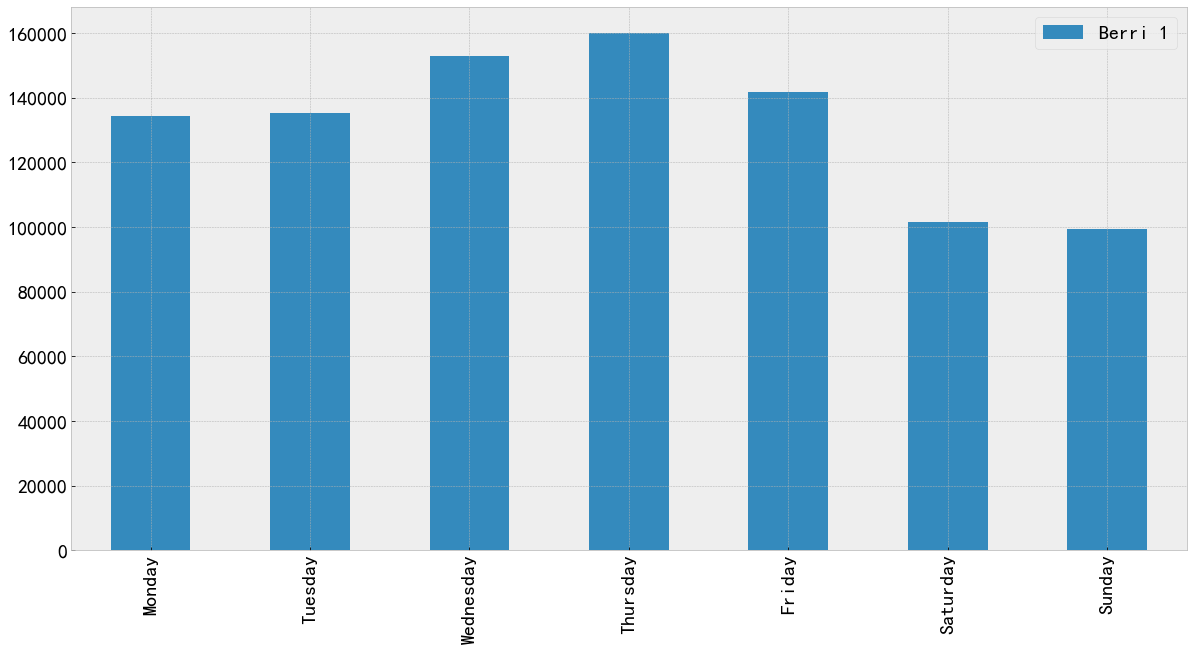

In [37]:
weekday_counts.plot(figsize=(20,10),kind='bar')

看似这个地区的同学骑自行车很多时候是工作日骑的，是去上班？

# 4.3 把刚才学的放一块儿

把刚才学到的东西串一块儿，能看到很神奇pandas处理结果啦。<br>
你可以试试把`sum` 换做 `max`或者`numpy.median`，求最大和平均，也可以试试更多的函数！！

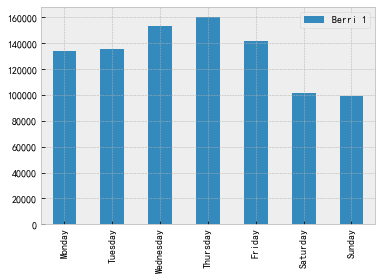

In [30]:
bikes = pd.read_csv('bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')